In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from process import get_processed_data
df = get_processed_data()

/home/alex/Documents/erosion_data_analytics/transformation.py:7: FutureWarning: the 'outtype' keyword is deprecated, use 'orient' instead
  vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())


Target of this notebook is to understand the statistical correlation/dependency between erosion rate and other values in the data. This allows to understand if a value can be imputed by means of statistics instead of being measured. 

## Preprocessing
To work with the data, few colums have to be dropped as they don't provide useful information. It might be interesting to correlate the papers or authors with their measured data, but, despite the possibility to find out who has conducted measurements properly, won't yield relevant insights.

In [50]:
df.drop('Paper', 1, inplace=True)
df.drop('Unnamed: 0', 1, inplace=True)
df.drop('Name', 1, inplace=True)

## Problematic Rows
In the following we have a look at rows containing null values. The particular reason for these values is unknown to us. However, due to their small number of 9, we can drop these rows. Further, we do not see a reason why these rows should be kept as missing data rather indicates missing resources for good measurements. Thus, we probably do not want to analyze these rows.

In [51]:
for c in df.columns:
    if any(pd.isnull(df[c])):
        print('Number of rows containing null values in column', c, ':', pd.isnull(df[c]).sum())

Number of rows containing null values in column Effective basin elevation (m) : 4
Number of rows containing null values in column Mean Basin slope : 4
Number of rows containing null values in column Mean annual precipitation (mm/yr) : 4
Number of rows containing null values in column Mean annual Temperature (C) : 4
Number of rows containing null values in column % Vegetation : 4
Number of rows containing null values in column Seismicity : 4
Number of rows containing null values in column Cronus erosion rate (m/My) : 8
Number of rows containing null values in column Cronus erosion rate error (m/My) : 9
Number of rows containing null values in column Climate zone main : 4
Number of rows containing null values in column Rock type : 4


In [52]:
print('Number of rows containing at least one null value:', df.isnull().any(1).sum())

Number of rows containing at least one null value: 9


We simply remove these rows from our table:

In [53]:
df.dropna(axis=1, how='any', inplace=True)
print('Leaving us with', df.isnull().any(1).sum(), 'rows containing null values')

Leaving us with 0 rows containing null values


Further, we observe rows containing Latitude and Longitude cells, which are provided in another format. For example, we have 1150 instead of 682778 instead of 68.2778 for Latitude. In the following these values are fixed. The factors of 1e4 and 1e3 can be retrieved from the data.

In [77]:
df.Latitude = df.Latitude.apply(lambda x: x if x <= 180 else x/1e4)
df.Longitude = df.Longitude.apply(lambda x: x if x <= 180 else x/1e3)

In [78]:
df[['Latitude', 'Longitude', 'Mean basin elevation (m)', 'Basin Relief (m)',
    'Basin Area (km2)', 'Mean Latutide (dec. Deg.)',
    'Mean Longitude (dec. Deg)', 'Seismic regime']].describe()

,Latitude,Longitude,Mean basin elevation (m),Basin Relief (m),Basin Area (km2),Mean Latutide (dec. Deg.),Mean Longitude (dec. Deg),Seismic regime
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,25.340087,-24.437908,1656.560435,1267.333304,11119.102678,24.925562,-19.883807,0.192174
std,24.002679,85.608829,1212.142861,1418.838541,78771.909540,23.565030,85.815442,0.394180
min,-36.667000,-124.240000,6.600000,-1.000000,0.000000,-36.636000,-124.099000,0.000000
25%,9.360750,-83.935500,654.000000,327.250000,2.812500,9.349250,-83.738500,0.000000
50%,34.535500,-67.742000,1409.000000,797.000000,16.170000,34.387500,-64.998000,0.000000
75%,40.155000,47.425750,2172.750000,1630.000000,301.690000,40.106000,79.338500,0.000000
max,150.162000,150.000000,5057.000000,7265.000000,1695910.000000,50.034000,150.182000,1.000000


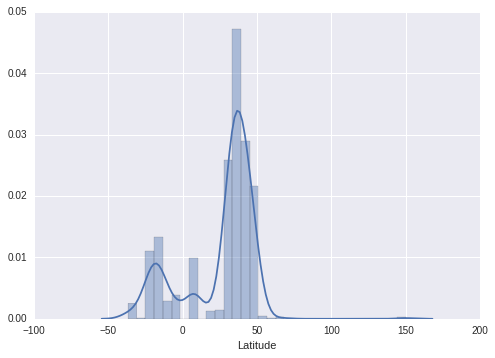

In [79]:
sns.distplot(df.Latitude)

In [56]:
len(df.Latitude)

1150

In [47]:
df.columns.values

array(['Latitude', 'Longitude', 'Mean basin elevation (m)',
       'Basin Relief (m)', 'Basin Area (km2)', 'Mean Latutide (dec. Deg.)',
       'Mean Longitude (dec. Deg)', 'Seismic regime',
       'Climate zone main=Arid', 'Climate zone main=Cold',
       'Climate zone main=Polar', 'Climate zone main=Temperate',
       'Climate zone main=Tropical', 'Rock type=Igneous',
       'Rock type=Metamorphic', 'Rock type=Mixed', 'Rock type=Sedimentary'], dtype=object)

In [13]:
from process import read_data
df_raw = read_data()
df_important = pd.DataFrame()
df_important["Mean Basin slope"] = df["Mean Basin slope"]
df_important["Rock type"] = df_raw["Rock type"]
df_important["Cronus erosion rate (m/My)"] = df["Cronus erosion rate (m/My)"]
df_important["Mean annual precipitation (mm/yr)"] = df["Mean annual precipitation (mm/yr)"]
df_important["% Vegetation"] = df["% Vegetation"]

In [14]:
df_important = df_important.dropna()
df_important

,Mean Basin slope,Rock type,Cronus erosion rate (m/My),Mean annual precipitation (mm/yr),% Vegetation
0,7.2,Mixed,6.95,735.0,5.0
1,20.1,Mixed,128.23,815.0,9.0
2,20.8,Mixed,126.29,716.0,9.0
3,19.2,Mixed,122.11,639.0,9.0
4,18.6,Mixed,89.53,626.0,9.0
5,26.1,Mixed,29.84,800.0,13.0
6,22.3,Mixed,162.25,792.0,12.0
7,21.0,Mixed,246.47,789.0,10.0
8,21.1,Mixed,118.49,763.0,13.0
9,21.4,Mixed,149.27,743.0,13.0


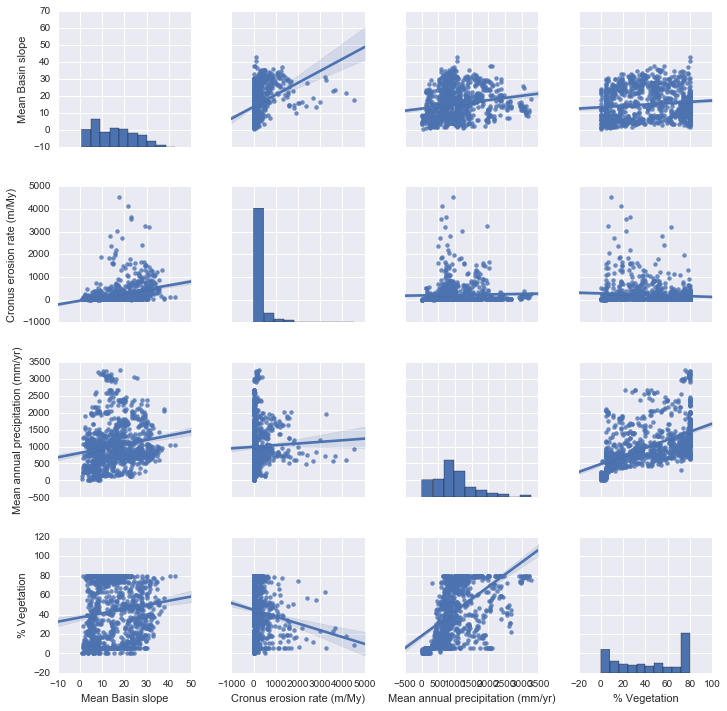

In [15]:
sb.pairplot(df_important, kind='reg')